In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df_water = pd.read_csv("../input/drinking-water-probability/drinking_water_potability.csv")
df_water.shape

(3276, 10)

###  Lets check for null values

In [3]:
df_water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

#### Lets see the distribution of ph.
- It should be between 0 - 14

0.0  to  14.0


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ph', ylabel='Density'>

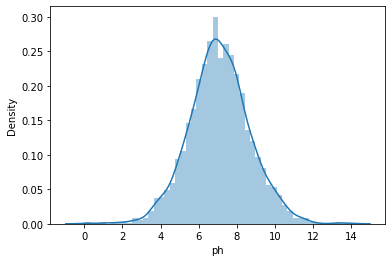

In [4]:
print(df_water['ph'].min()," to ",df_water['ph'].max())

sns.distplot(df_water['ph'])

### Its nicely normally distributed
- The center (mean) should be 7
- Justification: <b>Water is neutral in nature so pH is ideally close to 7</b>

In [5]:
print(f"Mean = {df_water['ph'].mean()} median = {df_water['ph'].median()}")


Mean = 7.080794504263179 median = 7.036752104


### Let us do cleaning for ph
- missing values = 7 for ph as per above analysis
- Even median will be 7 because 7 lies in between 0 and 14(middle value 50 %ile)
- For normal distributed data mean, median mode coincides

In [6]:
df_water['ph'] = df_water['ph'].fillna(df_water['ph'].mean())
df_water['ph'].isnull().sum()

0

In [7]:
df_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sulfate', ylabel='Density'>

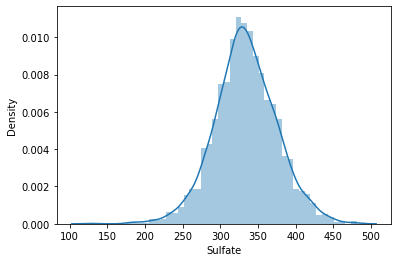

In [8]:
sns.distplot(df_water['Sulfate'])

In [9]:
sulfate = df_water['Sulfate'].mean()
df_water['Sulfate']= df_water['Sulfate'].fillna(sulfate)

## Now check for trihalomethanes

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Trihalomethanes', ylabel='Density'>

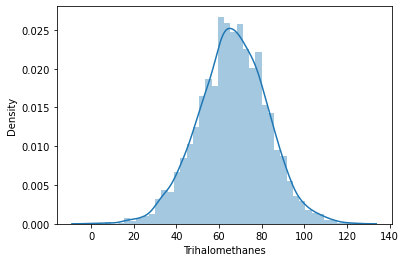

In [10]:
sns.distplot(df_water['Trihalomethanes'])

In [11]:
print(f"mean = {df_water['Trihalomethanes'].mean()}, median = {df_water['Trihalomethanes'].median()}")

mean = 66.39629294665926, median = 66.6224851


### We will treat missing value with median
- mean will also work as the distribution is normal

In [12]:
df_water['Trihalomethanes'] = df_water['Trihalomethanes'].fillna(df_water['Trihalomethanes'].median())

In [13]:
df_water.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### The missing values are treated and data is prepared

## Step 2: EDA

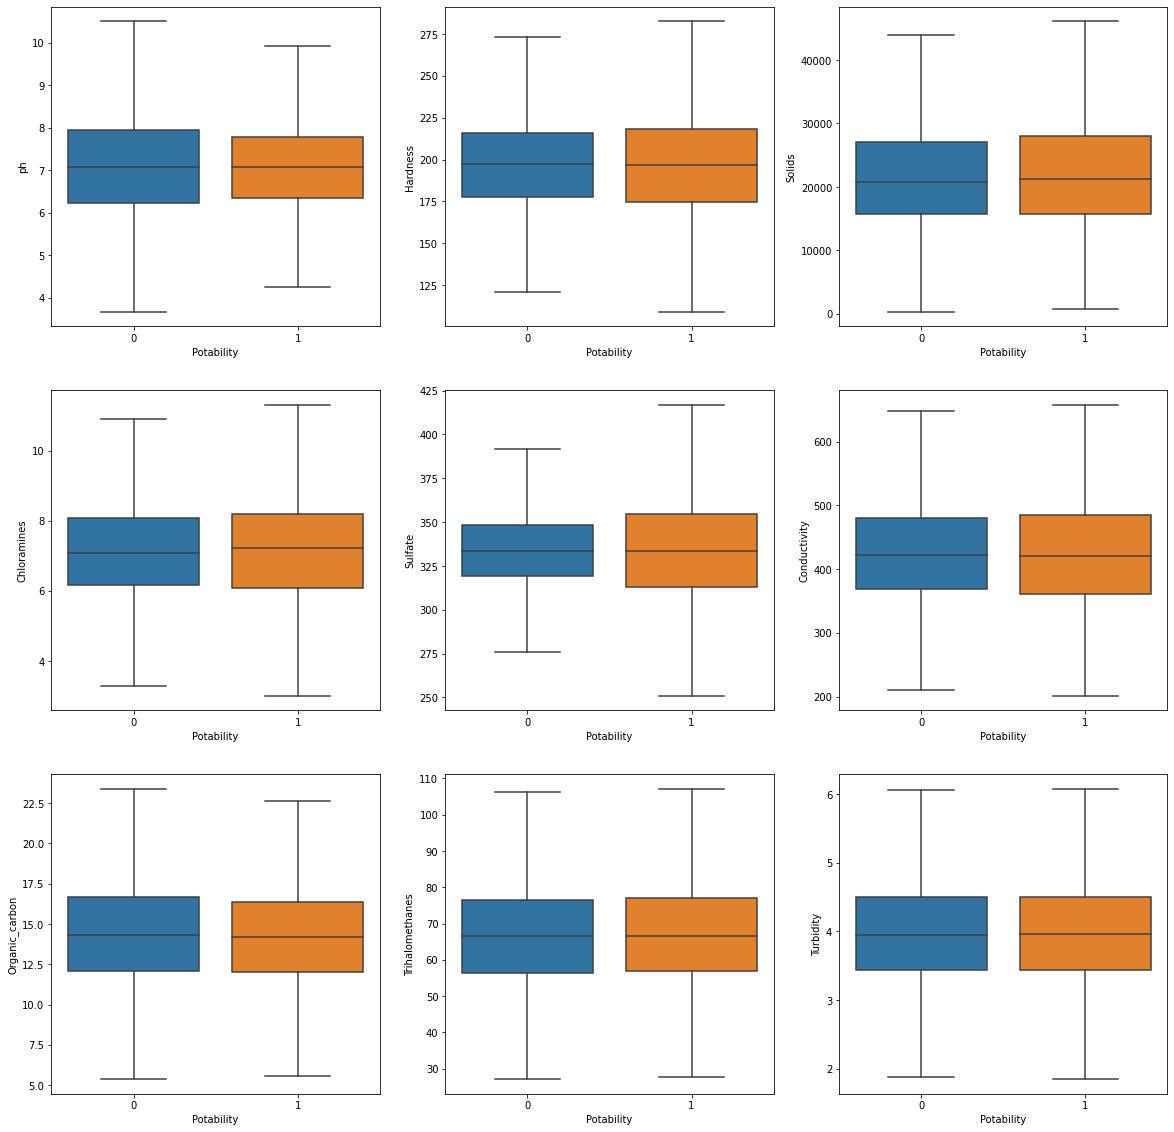

In [14]:
columns = [x for x in df_water.columns if x != 'Potability']
plt.figure(figsize=(20,20))
for i in range(9):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=df_water,x = 'Potability' ,y= columns[i],showfliers=False)

### The differences are not visible on plots
- Let us check 25th,50th  and 75th percentle
- This would help in understanding

In [15]:

def get_percentiles(df,columns,target,label):
    res = {}
    df_a = df[df[target] == label] 
    #print(df_a)
    for col in columns:
        x = np.quantile(df_a[col],0.25)
        y = np.quantile(df_a[col],0.5)
        z = np.quantile(df_a[col],0.75)
        res[col] = [x,y,z]
    df_res = pd.DataFrame(res,index=["Q1","Q2","Q3"])
    return df_res
        
    
#### Calling the above function for potable
get_percentiles(df_water,columns,'Potability',1)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
Q1  6.351824  174.330531  15668.985038     6.094134  313.052947    360.939023   
Q2  7.080795  196.632907  21199.386615     7.215163  333.775777    420.712729   
Q3  7.780068  218.003420  27973.236447     8.199261  354.807924    484.155911   

    Organic_carbon  Trihalomethanes  Turbidity  
Q1       12.033897        56.911186   3.430909  
Q2       14.162809        66.622485   3.958576  
Q3       16.356245        77.067457   4.509569

In [16]:
#### Calling the above function for non potable
get_percentiles(df_water,columns,'Potability',0)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
Q1  6.224046  177.823265  15663.057382     6.155640  319.354715    368.498530   
Q2  7.080795  197.123423  20809.618280     7.090334  333.775777    422.229331   
Q3  7.940697  216.120687  27006.249013     8.066462  348.316746    480.677198   

    Organic_carbon  Trihalomethanes  Turbidity  
Q1       12.101057        56.441831   3.444062  
Q2       14.293508        66.622485   3.948076  
Q3       16.649485        76.518849   4.496106

### Let us check the min and max

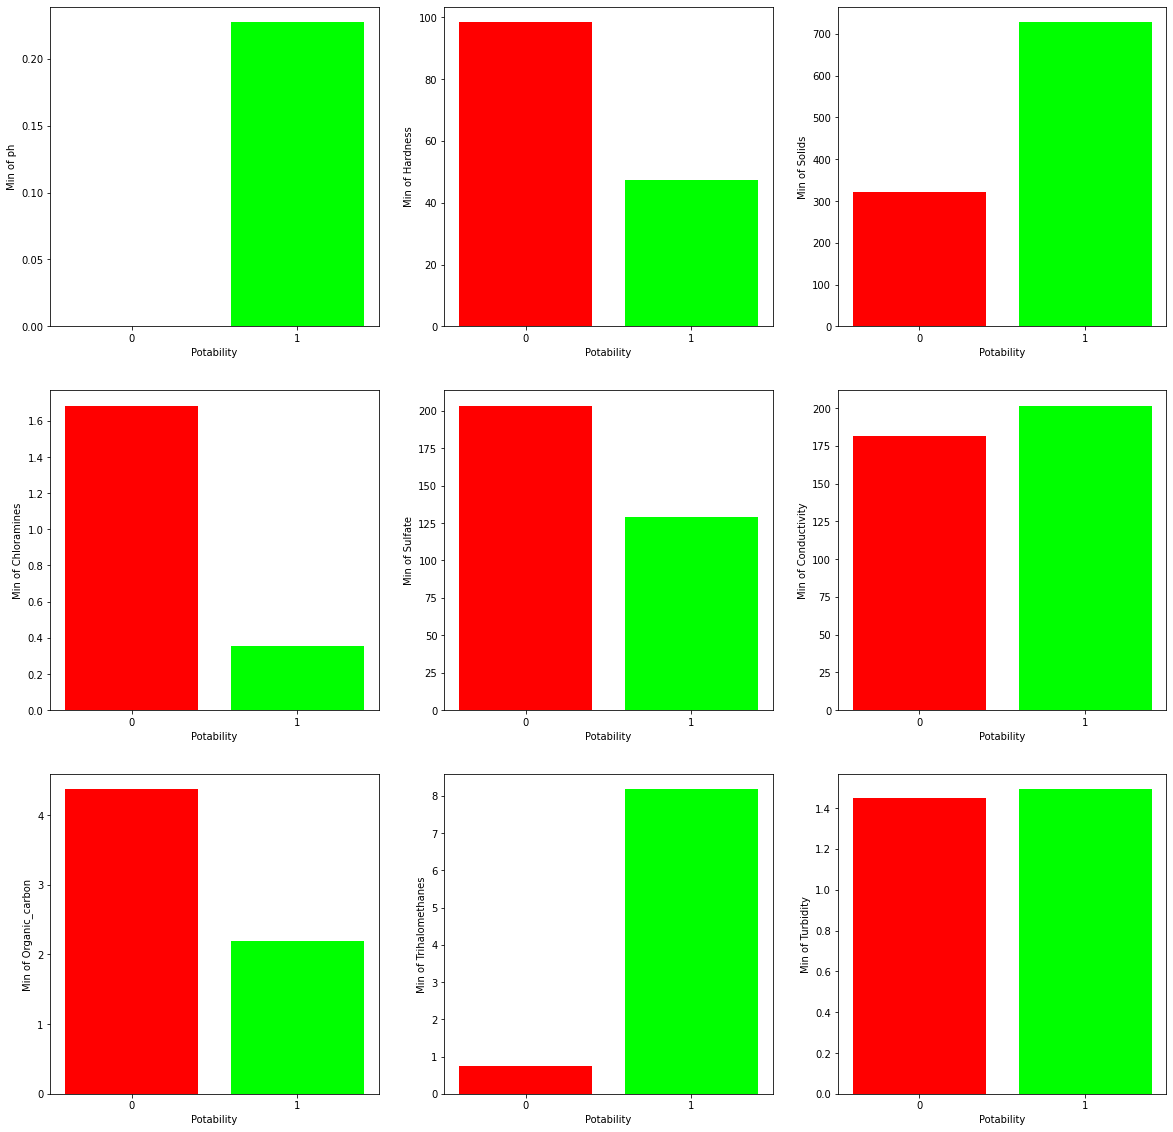

In [17]:
plt.figure(figsize=(20,20))
for i in range(9):
    plt.subplot(3,3,i+1)
    y_0 = df_water.loc[df_water['Potability'] == 0,columns[i]].min()
    y_1 = df_water.loc[df_water['Potability'] == 1,columns[i]].min()
    plt.bar([0,1],[y_0,y_1],color=['#ff0000','#00ff00'])
    plt.xlabel("Potability")
    plt.ylabel('Min of {0}'.format(columns[i]))
    plt.xticks([0,1])


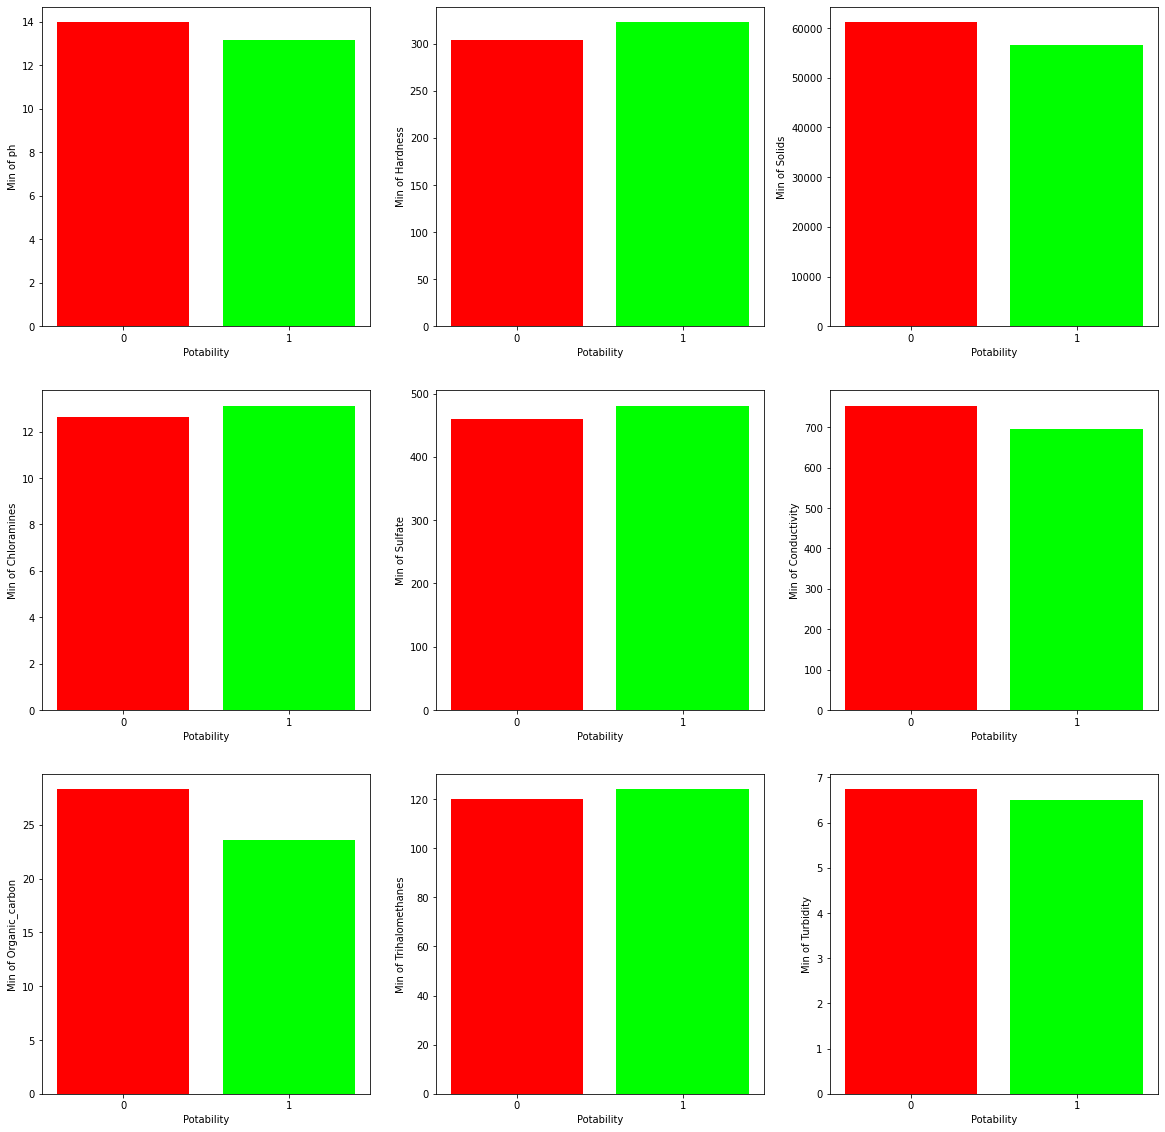

In [18]:
plt.figure(figsize=(20,20))
for i in range(9):
    plt.subplot(3,3,i+1)
    y_0 = df_water.loc[df_water['Potability'] == 0,columns[i]].max()
    y_1 = df_water.loc[df_water['Potability'] == 1,columns[i]].max()
    plt.bar([0,1],[y_0,y_1],color=['#ff0000','#00ff00'])
    plt.xlabel("Potability")
    plt.ylabel('Min of {0}'.format(columns[i]))
    plt.xticks([0,1])


## There are differences observed 
- Here still water with ph = 12 is labelled as potable "Which is a serious outlier"
- We will have to treat it

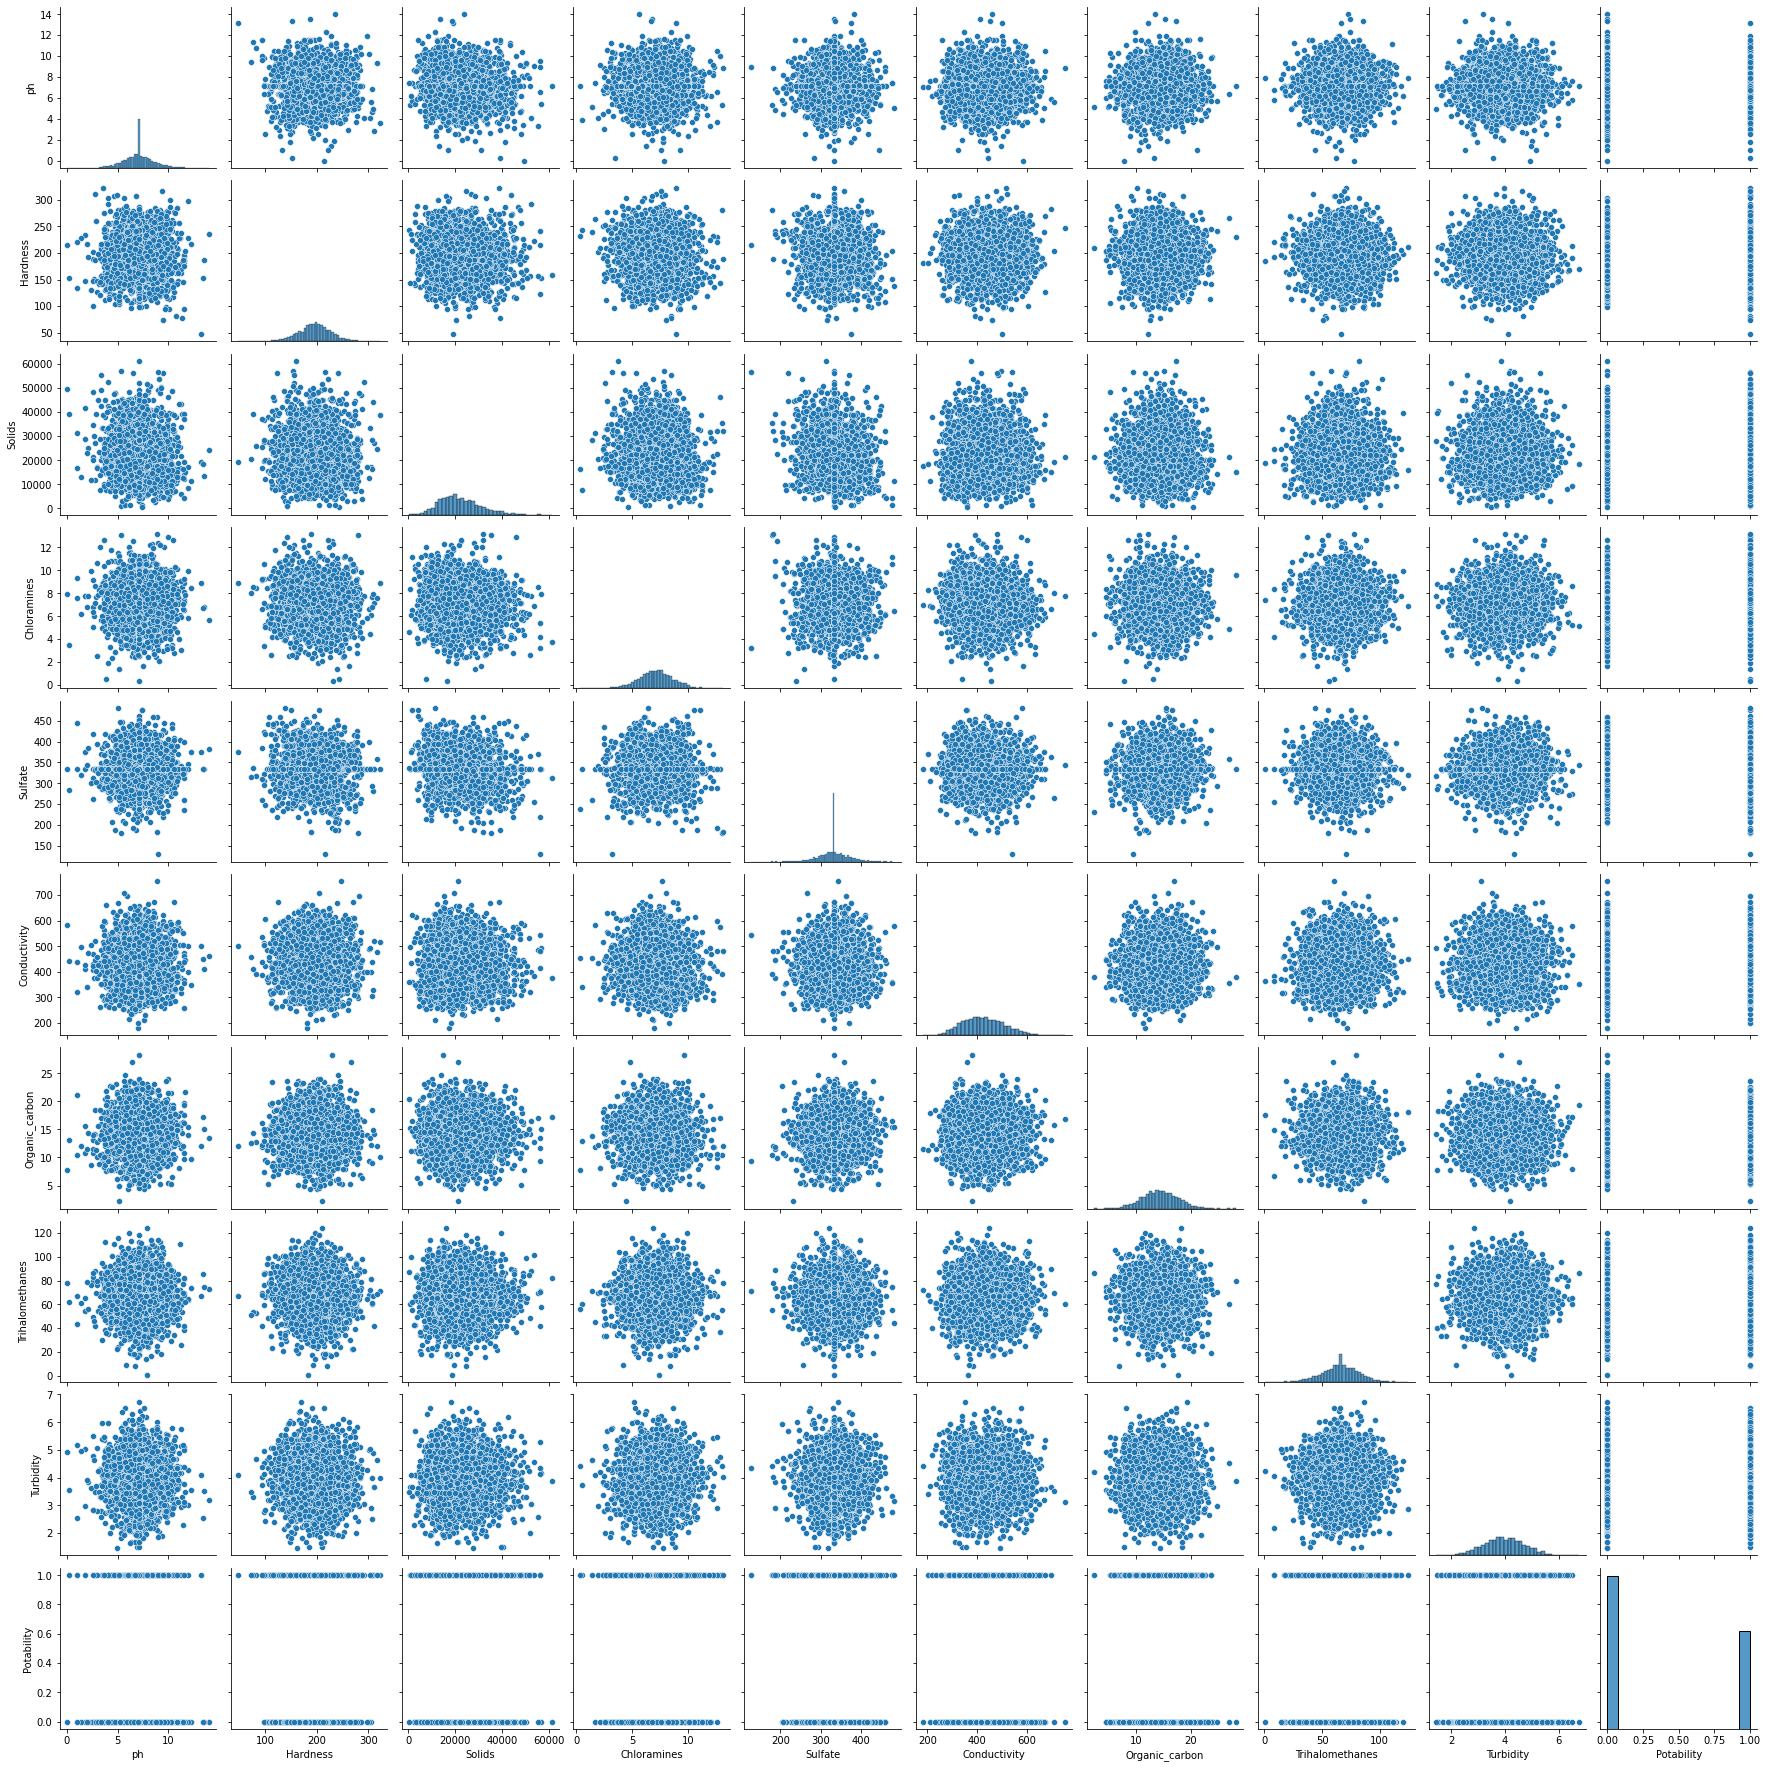

In [19]:
sns.pairplot(data=df_water)

#### Letus do outlier treatment for the data which is labelled as potable `1`
- Large outliers are possible for water which is unfit for drinking
- Thats why doing outier treatment on water which is potable

In [20]:
def treat_outliers(df,columns,target,label):
    for c in columns:
        q1 = np.quantile(df.loc[df[target] == label,c],0.25)
        q3 = np.quantile(df.loc[df[target] == label,c],0.75)
        df.loc[df[target] == label,c] = df.loc[df[target] == label,c].apply(lambda x: q1 if x<q1 else x)
        df.loc[df[target] == label,c] = df.loc[df[target] == label,c].apply(lambda x: q3 if x>q3 else x)
        

### If not required we can analyze by skipping

In [21]:
treat_outliers(df_water,columns,'Potability',1)

<AxesSubplot:>

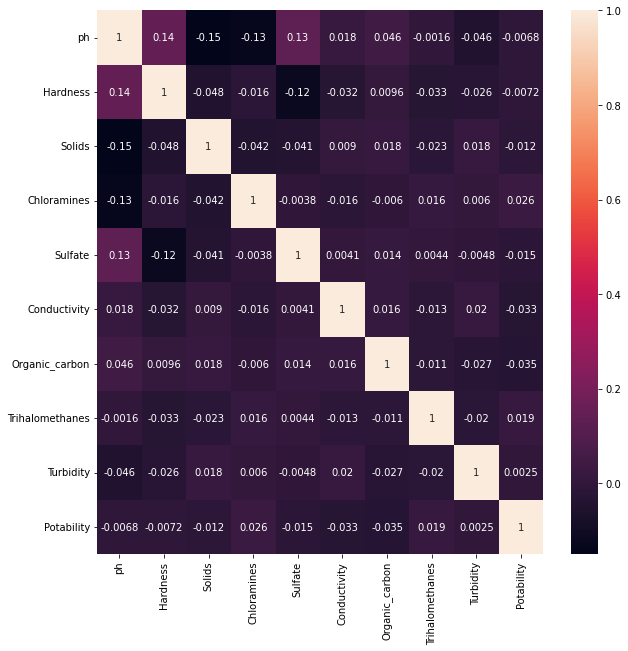

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df_water.corr(),annot=True)

In [23]:
import statsmodels.api as sm
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_water[[c for c in df_water.columns if c != 'Potability']],df_water['Potability'],train_size = 0.7,random_state = 1)

## Scaling the input features

In [25]:
sc = StandardScaler()
X_train[X_train.columns] = sc.fit_transform(X_train)
X_test[X_test.columns] = sc.transform(X_test)

In [26]:
from imblearn.over_sampling import SMOTE

X_train, y_train = SMOTE(random_state=1,n_jobs=-1).fit_resample(X_train,y_train)

In [27]:
X_train_sm = sm.add_constant(X_train)
lm = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
lm.summary()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             Potability   No. Observations:                 2826
Model:                            GLM   Df Residuals:                     2816
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1952.7
Date:                Fri, 08 Oct 2021   Deviance:                       3905.5
Time:                        07:55:54   Pearson chi2:                 2.83e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0018      0.038     -0.047      0.963      -0.076       0.072
ph                 -0.0273      0.042     -0.642      0.521      -0.111       0.056
Hardness           -0.0527      0.041     -1.285      0.199      -0.133       0.028
Solids             -0.0214      0.041     -0.527      0.598      -0.101       0.058
Chloramines         0.0282      0.041      0.695      0.487      -0.051       0.108
Sulfate            -0.0309      0.041     -0.751      0.453      -0.111       0.050
Conductivity       -0.0866      0.040     -2.165      0.030      -0.165      -0.008
Organic_carbon     -0.0497      0.040     -1.236      0.217      -0.129       0.029
Trihalomethanes     0.0332      0.040      0.823      0.411      -0.046       0.112
Turbidity           0.0464      0.040      1.154      0.248      -0.032       0.125
===================================================================================
"""

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(data):
    res = pd.DataFrame()
    res['Feature'] = data.columns
    res['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return res

vif(X_train_sm)

Feature       VIF
0            const  1.000219
1               ph  1.067309
2         Hardness  1.046731
3           Solids  1.032781
4      Chloramines  1.023072
5          Sulfate  1.035191
6     Conductivity  1.004752
7   Organic_carbon  1.002983
8  Trihalomethanes  1.002744
9        Turbidity  1.004659

### Vif is less which is good 
- We will use the model for predictions

In [29]:
## Add constant to x test
X_test_sm = sm.add_constant(X_test)
y_train_pred = lm.predict(X_train_sm)



/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Let us plot the ROC curve to finalize the cutoff

In [30]:
from sklearn.metrics import confusion_matrix

def tp_fp(cf):
    fp = cf[0,1]/(cf[0,0] + cf[0,1])
    tp = cf[1,1]/(cf[1,0] + cf[1,1])
    return fp,tp


def plot_roc(data,truth):
    cutoff = [0.001*i for i in range(1,1000)]
    x = []
    y = []
    for c in cutoff:
        #print(data)
        data_temp = data.apply(lambda x: 1 if x>=c else 0)
        cf = confusion_matrix(truth,data_temp)
        x.append(tp_fp(cf)[0])
        y.append(tp_fp(cf)[1])
    plt.plot(x,y)

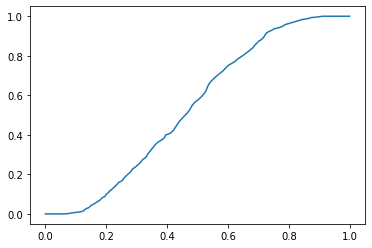

In [31]:
plot_roc(y_train_pred,y_train)

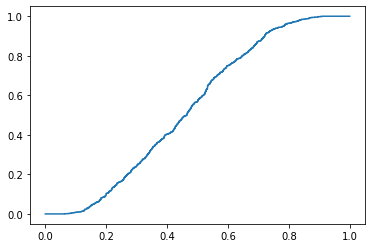

In [32]:
from sklearn.metrics import roc_curve
fp,tp,_ = roc_curve(y_train,y_train_pred)
plt.plot(fp,tp)

## not able to find best threshold
lets take 0.5

In [33]:
y_test_pred = lm.predict(X_test_sm).apply(lambda x: 1 if x>= 0.5 else 0)

cf = confusion_matrix(y_test,y_test_pred)
acc = (cf[0,0] + cf[1,1])/(cf[0,0] + cf[0,1] + cf[1,1] +cf[1,0])
tpr = cf[1,1]/(cf[1,0] + cf[1,1])
print(f"tpr = {tpr} accuracy = {acc}")

tpr = 0.5150753768844221 accuracy = 0.5106815869786369


In [34]:
dt = DecisionTreeClassifier(random_state=1)
params = {
    "min_samples_split": [10,20,100],
    "max_depth": [5,10,50],
    "min_samples_leaf": [10,20,50],
    "max_leaf_nodes": [10,20,100]
}

dt_grid = GridSearchCV(estimator=dt,param_grid=params,cv=5,scoring='balanced_accuracy',verbose=10,n_jobs = -1).fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1889s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0839s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1254s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.9s


[CV] max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10 
[CV]  max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10, score=0.905, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20 
[CV]  max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, score=0.901, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20 
[CV]  max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, score=0.905, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=100 
[CV]  max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=100, score=0.901, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=100 
[CV]  max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=100, score=0.911, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=10, min_samples_leaf=20

[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:    3.9s



[CV]  max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=100, score=0.975, total=   0.0s
[CV] max_depth=10, max_leaf_nodes=10, min_samples_leaf=50, min_samples_split=20 
[CV]  max_depth=10, max_leaf_nodes=10, min_samples_leaf=50, min_samples_split=20, score=0.952, total=   0.0s
[CV] max_depth=10, max_leaf_nodes=10, min_samples_leaf=50, min_samples_split=20 
[CV]  max_depth=10, max_leaf_nodes=10, min_samples_leaf=50, min_samples_split=20, score=0.934, total=   0.0s
[CV] max_depth=10, max_leaf_nodes=10, min_samples_leaf=50, min_samples_split=20 
[CV]  max_depth=10, max_leaf_nodes=10, min_samples_leaf=50, min_samples_split=20, score=0.945, total=   0.0s
[CV] max_depth=10, max_leaf_nodes=10, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=10, max_leaf_nodes=10, min_samples_leaf=50, min_samples_split=100, score=0.933, total=   0.0s
[CV] max_depth=10, max_leaf_nodes=10, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=10, max_leaf_nodes=10, min_sa

[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    5.0s finished


In [35]:
dt = dt_grid.best_estimator_
y_train_pred = dt.predict(X_train)
print(confusion_matrix(y_train_pred,y_train))

[[1389    0]
 [  24 1413]]


### Model doing a good job on train data. Lets evaluate on test data

In [36]:
y_test_pred = dt.predict(X_test)
print(confusion_matrix(y_test_pred,y_test))

cf = confusion_matrix(y_test_pred,y_test)

#### get metrics
def metrics(cf):
    acc = (cf[0,0] + cf[1,1])/(cf[0,0]+ cf[0,1] + cf[1,0] + cf[1,1])
    recall = (cf[1,1])/(cf[1,0] + cf[1,1])
    specificty = (cf[0,0])/(cf[0,0] + cf[0,1])
    print("accuracy = {0}\n\nSensitivity(TPR) = {1}\n\nSpecificity = {2}".format(acc,recall,specificty))
    
metrics(cf)

[[563   0]
 [ 22 398]]
accuracy = 0.9776195320447609

Sensitivity(TPR) = 0.9476190476190476

Specificity = 1.0


### Decision tree did a great job 
- Good results can cause overfitting in future because we have not evaluated on actual data
- Let us try Random forest

In [37]:
rf = RandomForestClassifier(random_state=1)
params = {
    "min_samples_split": [10,20,100],
    "max_depth": [5,10,50],
    "min_samples_leaf": [10,20,50],
    "max_leaf_nodes": [10,20,100],
    "max_features": [9,5]
}

rf_grid = GridSearchCV(estimator=rf,param_grid=params,cv=5,scoring='balanced_accuracy',verbose=10,n_jobs = -1).fit(X_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   22.0s



[CV]  max_depth=50, max_leaf_nodes=20, min_samples_leaf=50, min_samples_split=20, score=0.936, total=   0.0s
[CV] max_depth=50, max_leaf_nodes=20, min_samples_leaf=50, min_samples_split=20 
[CV]  max_depth=50, max_leaf_nodes=20, min_samples_leaf=50, min_samples_split=20, score=0.956, total=   0.0s
[CV] max_depth=50, max_leaf_nodes=20, min_samples_leaf=50, min_samples_split=20 
[CV]  max_depth=50, max_leaf_nodes=20, min_samples_leaf=50, min_samples_split=20, score=0.938, total=   0.0s
[CV] max_depth=50, max_leaf_nodes=20, min_samples_leaf=50, min_samples_split=20 
[CV]  max_depth=50, max_leaf_nodes=20, min_samples_leaf=50, min_samples_split=20, score=0.906, total=   0.0s
[CV] max_depth=50, max_leaf_nodes=20, min_samples_leaf=50, min_samples_split=20 
[CV]  max_depth=50, max_leaf_nodes=20, min_samples_leaf=50, min_samples_split=20, score=0.924, total=   0.0s
[CV] max_depth=50, max_leaf_nodes=20, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=50, max_leaf_nodes=20, min_sampl

[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   49.6s



[CV] max_depth=5, max_features=9, max_leaf_nodes=100, min_samples_leaf=10, min_samples_split=20 
[CV]  max_depth=5, max_features=9, max_leaf_nodes=100, min_samples_leaf=10, min_samples_split=20, score=0.926, total=   1.0s
[CV] max_depth=5, max_features=9, max_leaf_nodes=100, min_samples_leaf=10, min_samples_split=100 
[CV]  max_depth=5, max_features=9, max_leaf_nodes=100, min_samples_leaf=10, min_samples_split=100, score=0.958, total=   1.0s
[CV] max_depth=5, max_features=9, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=10 
[CV]  max_depth=5, max_features=9, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=10, score=0.936, total=   0.9s
[CV] max_depth=5, max_features=9, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=10 
[CV]  max_depth=5, max_features=9, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=10, score=0.949, total=   0.9s
[CV] max_depth=5, max_features=9, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=20 
[CV]  max_de

[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   59.6s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  1.5min



[CV]  max_depth=5, max_features=5, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=10, score=0.954, total=   0.8s
[CV] max_depth=5, max_features=5, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=20 
[CV]  max_depth=5, max_features=5, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=20, score=0.961, total=   0.7s
[CV] max_depth=5, max_features=5, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=100 
[CV]  max_depth=5, max_features=5, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=100, score=0.943, total=   0.7s
[CV] max_depth=5, max_features=5, max_leaf_nodes=100, min_samples_leaf=50, min_samples_split=10 
[CV]  max_depth=5, max_features=5, max_leaf_nodes=100, min_samples_leaf=50, min_samples_split=10, score=0.977, total=   0.7s
[CV] max_depth=5, max_features=5, max_leaf_nodes=100, min_samples_leaf=50, min_samples_split=20 
[CV]  max_depth=5, max_features=5, max_leaf_nodes=100, min_samples_leaf=50, min_samples_split=20, score=0.936

[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 473 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 537 tasks      | elapsed:  2.1min



[CV]  max_depth=10, max_features=9, max_leaf_nodes=100, min_samples_leaf=50, min_samples_split=10, score=0.970, total=   1.2s
[CV] max_depth=10, max_features=9, max_leaf_nodes=100, min_samples_leaf=50, min_samples_split=20 
[CV]  max_depth=10, max_features=9, max_leaf_nodes=100, min_samples_leaf=50, min_samples_split=20, score=0.943, total=   1.2s
[CV] max_depth=10, max_features=9, max_leaf_nodes=100, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=10, max_features=9, max_leaf_nodes=100, min_samples_leaf=50, min_samples_split=100, score=0.989, total=   1.2s
[CV] max_depth=10, max_features=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10 
[CV]  max_depth=10, max_features=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10, score=0.989, total=   0.9s
[CV] max_depth=10, max_features=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10 
[CV]  max_depth=10, max_features=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10, score=

[Parallel(n_jobs=-1)]: Done 570 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 605 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 677 tasks      | elapsed:  2.9min



[CV]  max_depth=50, max_features=9, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10, score=0.977, total=   1.4s
[CV] max_depth=50, max_features=9, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10 
[CV]  max_depth=50, max_features=9, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10, score=0.986, total=   1.3s
[CV] max_depth=50, max_features=9, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20 
[CV]  max_depth=50, max_features=9, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, score=0.984, total=   1.3s
[CV] max_depth=50, max_features=9, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=100 
[CV]  max_depth=50, max_features=9, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=100, score=0.982, total=   1.3s
[CV] max_depth=50, max_features=9, max_leaf_nodes=10, min_samples_leaf=20, min_samples_split=10 
[CV]  max_depth=50, max_features=9, max_leaf_nodes=10, min_samples_leaf=20, min_samples_split=10, score=0.988

[Parallel(n_jobs=-1)]: Done 714 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 753 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  3.4min finished


In [38]:
rf = rf_grid.best_estimator_

y_train_pred = rf.predict(X_train)
confusion_matrix(y_train,y_train_pred)

array([[1402,   11],
       [   0, 1413]])

In [39]:

y_test_pred = rf.predict(X_test)
cf = confusion_matrix(y_test,y_test_pred)
metrics(cf)

accuracy = 0.9867751780264497

Sensitivity(TPR) = 1.0

Specificity = 0.9777777777777777


## Random forest too gave good results

In [40]:
gb = GradientBoostingClassifier(random_state=1)
param_grid = {
    "max_depth": [3,5],
    "min_samples_split": [10,20, 50],
    "min_samples_leaf": [30,50],
    "n_estimators": [50,100],
    "learning_rate": [0.01, 0.05, 0.1]
}

cv = GridSearchCV(estimator=gb, param_grid=param_grid,cv=5,scoring='balanced_accuracy',verbose=10,n_jobs=-1).fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.2s



[CV]  max_depth=50, max_features=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=100, score=0.984, total=   0.9s
[CV] max_depth=50, max_features=5, max_leaf_nodes=10, min_samples_leaf=20, min_samples_split=10 
[CV]  max_depth=50, max_features=5, max_leaf_nodes=10, min_samples_leaf=20, min_samples_split=10, score=0.972, total=   0.9s
[CV] max_depth=50, max_features=5, max_leaf_nodes=10, min_samples_leaf=20, min_samples_split=20 
[CV]  max_depth=50, max_features=5, max_leaf_nodes=10, min_samples_leaf=20, min_samples_split=20, score=0.989, total=   0.9s
[CV] max_depth=50, max_features=5, max_leaf_nodes=10, min_samples_leaf=20, min_samples_split=100 
[CV]  max_depth=50, max_features=5, max_leaf_nodes=10, min_samples_leaf=20, min_samples_split=100, score=0.977, total=   0.9s
[CV] max_depth=50, max_features=5, max_leaf_nodes=10, min_samples_leaf=20, min_samples_split=100 
[CV]  max_depth=50, max_features=5, max_leaf_nodes=10, min_samples_leaf=20, min_samples_split=100, score=0.

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.1s



[CV]  max_depth=50, max_features=5, max_leaf_nodes=10, min_samples_leaf=20, min_samples_split=10, score=0.977, total=   0.9s
[CV] max_depth=50, max_features=5, max_leaf_nodes=10, min_samples_leaf=20, min_samples_split=10 
[CV]  max_depth=50, max_features=5, max_leaf_nodes=10, min_samples_leaf=20, min_samples_split=10, score=0.977, total=   0.9s
[CV] max_depth=50, max_features=5, max_leaf_nodes=10, min_samples_leaf=20, min_samples_split=20 
[CV]  max_depth=50, max_features=5, max_leaf_nodes=10, min_samples_leaf=20, min_samples_split=20, score=0.984, total=   0.9s
[CV] max_depth=50, max_features=5, max_leaf_nodes=10, min_samples_leaf=20, min_samples_split=100 
[CV]  max_depth=50, max_features=5, max_leaf_nodes=10, min_samples_leaf=20, min_samples_split=100, score=0.972, total=   0.9s
[CV] max_depth=50, max_features=5, max_leaf_nodes=10, min_samples_leaf=50, min_samples_split=10 
[CV]  max_depth=50, max_features=5, max_leaf_nodes=10, min_samples_leaf=50, min_samples_split=10, score=0.988

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   30.8s



[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=30, min_samples_split=50, n_estimators=100, score=0.975, total=   0.9s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=50, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=50, min_samples_split=10, n_estimators=50, score=0.959, total=   0.4s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=50, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=50, min_samples_split=10, n_estimators=50, score=0.924, total=   0.4s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=0.947, total=   0.9s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=50, min_samples_split=20, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=50, min_samples_split=20, n_estimators=50, s

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   34.2s



[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=30, min_samples_split=50, n_estimators=100, score=0.940, total=   0.9s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=50, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=50, min_samples_split=10, n_estimators=50, score=0.929, total=   0.4s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=0.954, total=   0.9s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=50, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=50, min_samples_split=10, n_estimators=100, score=0.959, total=   0.9s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=50, min_samples_split=20, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=50, min_samples_split=20, n_estimators=10

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  1.1min



[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=0.991, total=   0.9s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=50, min_samples_split=50, n_estimators=100 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=50, min_samples_split=50, n_estimators=100, score=0.982, total=   0.9s
[CV] learning_rate=0.05, max_depth=5, min_samples_leaf=30, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.05, max_depth=5, min_samples_leaf=30, min_samples_split=10, n_estimators=50, score=0.980, total=   0.7s
[CV] learning_rate=0.05, max_depth=5, min_samples_leaf=30, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.05, max_depth=5, min_samples_leaf=30, min_samples_split=10, n_estimators=100, score=0.988, total=   1.4s
[CV] learning_rate=0.05, max_depth=5, min_samples_leaf=30, min_samples_split=20, n_estimators=50 
[CV]  learning_rate=0.05, max_depth=5, min_samples_leaf=30, min_samples_split=20, n_estimators=50,

[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  1.2min



[CV] learning_rate=0.05, max_depth=5, min_samples_leaf=30, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.05, max_depth=5, min_samples_leaf=30, min_samples_split=10, n_estimators=50, score=0.988, total=   0.7s
[CV] learning_rate=0.05, max_depth=5, min_samples_leaf=30, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.05, max_depth=5, min_samples_leaf=30, min_samples_split=10, n_estimators=50, score=0.984, total=   0.7s
[CV] learning_rate=0.05, max_depth=5, min_samples_leaf=30, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.05, max_depth=5, min_samples_leaf=30, min_samples_split=10, n_estimators=100, score=0.991, total=   1.4s
[CV] learning_rate=0.05, max_depth=5, min_samples_leaf=30, min_samples_split=20, n_estimators=50 
[CV]  learning_rate=0.05, max_depth=5, min_samples_leaf=30, min_samples_split=20, n_estimators=50, score=0.988, total=   0.7s
[CV] learning_rate=0.05, max_depth=5, min_samples_leaf=30, min_samples_split=20, n_estimators=50 
[CV

[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.3min finished


In [41]:
gb = cv.best_estimator_

y_train_pred = gb.predict(X_train)
cf = confusion_matrix(y_train,y_train_pred)

print(cf)
acc = (cf[0,0] + cf[1,1])/np.sum(cf)
recall = (cf[1,1])/(cf[1,1] + cf[1,0])
spec = (cf[0,0])/(cf[0,1] + cf[0,0])
print(f"Accuracy = {acc} Recall = {recall} Specificity = {spec}")

[[1411    2]
 [   0 1413]]
Accuracy = 0.9992922859164898 Recall = 1.0 Specificity = 0.9985845718329794


### All the models from tree families gave 99 % accuracy